# Comparison of taxa and qualitative classification

In [2]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import husl
from legendgram import legendgram
import mapclassify
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.colors import ListedColormap
from random import shuffle
from tqdm import tqdm

from download import download

In [3]:
clusters = pd.read_csv('prg_cluster_labels_10.csv', index_col=0)

In [14]:
download("https://www.dropbox.com/s/tk60wnx0knshon6/20200421_ZakazkaMF_data_validacni.gdb.zip?dl=1", "ipr", kind="zip")

Creating data folder...
Extracting zip file...
Successfully downloaded / unzipped to ipr


'ipr'

In [15]:
import fiona
fiona.listlayers("ipr/20200421_ZakazkaMF_data_validacni.gdb")

['URK_LokalityStav_p', 'URK_SS_VyuzitiZakl_p', 'VyvojZastavby_p']

In [4]:
qual = gpd.read_file("ipr/20200421_ZakazkaMF_data_validacni.gdb", layer='URK_LokalityStav_p')

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [5]:
buildings = gpd.read_file('geometry.gpkg', layer='buildings')

In [6]:
buildings['cent'] = buildings.centroid
buildings = buildings.set_geometry('cent')

In [7]:
buildings = buildings.to_crs(qual.crs)

In [8]:
joined = gpd.sjoin(buildings, qual, how='left', op="within")

In [9]:
joined = joined.merge(clusters, how='left', on='uID')

In [10]:
joined.head(2)

uID                                           geometry  \
0    0  POLYGON ((-749844.585 -1052277.805, -749844.41...   
1    1  POLYGON ((-744449.580 -1042702.590, -744447.15...   

                               cent  index_right     ID CISLO_TXT  \
0  POINT (-749841.681 -1052279.951)          233  16170       617   
1  POINT (-744432.289 -1042699.409)          702  10080       008   

           NAZEV_STAV  ZASTAVENOST  VYUZITI_STAV  STRUKTURA_STAV  \
0  Cementárna Radotín            1             2               8   
1         Malá Strana            1             1               1   

   MIRA_STABILITY_STAV  TYP_MESTA  KRAJINA  Shape_Length     Shape_Area  \
0                    5        1.0        1   2815.203269  239855.665606   
1                    4        1.0        1   5419.046731  692062.403477   

   cluster  
0      0.0  
1      7.0

In [23]:
joined = joined.set_geometry('geometry')

## plot

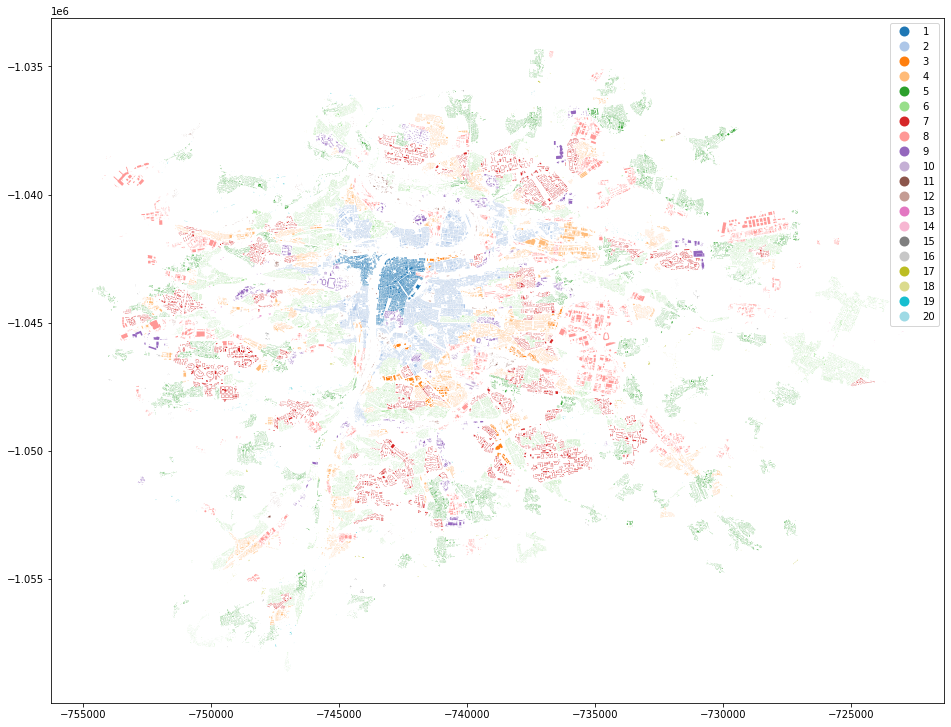

In [18]:
joined.plot('STRUKTURA_STAV', figsize=(16, 16), categorical=True, cmap='tab20', legend=True)

In [11]:
def north_arrow(f, ax, rotation=0, loc=2, legend_size=(.1,.1), frameon=False, thick=.1, outline=3, edgecolor='k', facecolor='k'):
    from legendgram.util import make_location
    from matplotlib.transforms import Affine2D
    
    arrpos = make_location(ax, loc, legend_size=legend_size)
    arrax = f.add_axes(arrpos)

    circle = plt.Circle((0, 0), radius=1, edgecolor=edgecolor, facecolor='w', linewidth=outline)
    arrax.add_patch(circle)

    rectangle = plt.Rectangle((-0.05, 0), thick, 1, facecolor=facecolor)
    t = Affine2D().rotate_deg(rotation) + arrax.transData
    rectangle.set_transform(t)
    arrax.add_patch(rectangle)
    arrax.axis('scaled')
    arrax.set_frame_on(frameon)
    arrax.get_yaxis().set_visible(False)
    arrax.get_xaxis().set_visible(False)
    return arrax

In [17]:
joined.STRUKTURA_STAV.unique()

array([ 8,  1,  5,  6,  4,  3,  7,  2,  9, 19, 17, 11, 15, 18, 13, 10, 14,
       20, 12, 16])

In [12]:
colors = [(257, 71, 27), (98, 93, 78), (14, 79, 58), (26, 0, 50),
          (75, 90, 85), (347, 72, 60), (246, 79, 60)]
cols = [husl.husl_to_hex(*color) for color in colors]
cols_2 = []
for col in colors:
    pal = sns.light_palette(col, input="husl", n_colors=4)
    for rgb in pal[1:-1]:
        cols_2.append(rgb)
shuffle(cols_2)
cols = cols + cols_2
fig, ax = plt.subplots(figsize=(20, 5))
for i, c in enumerate(cols):
    ax.add_artist(plt.Circle((i, 0), 0.4, color=c))    
    ax.set_axis_off()
    ax.set_aspect(1)
    ax.autoscale()
    plt.xlim(-1.25,31.25)

In [13]:
cmap = ListedColormap(cols)

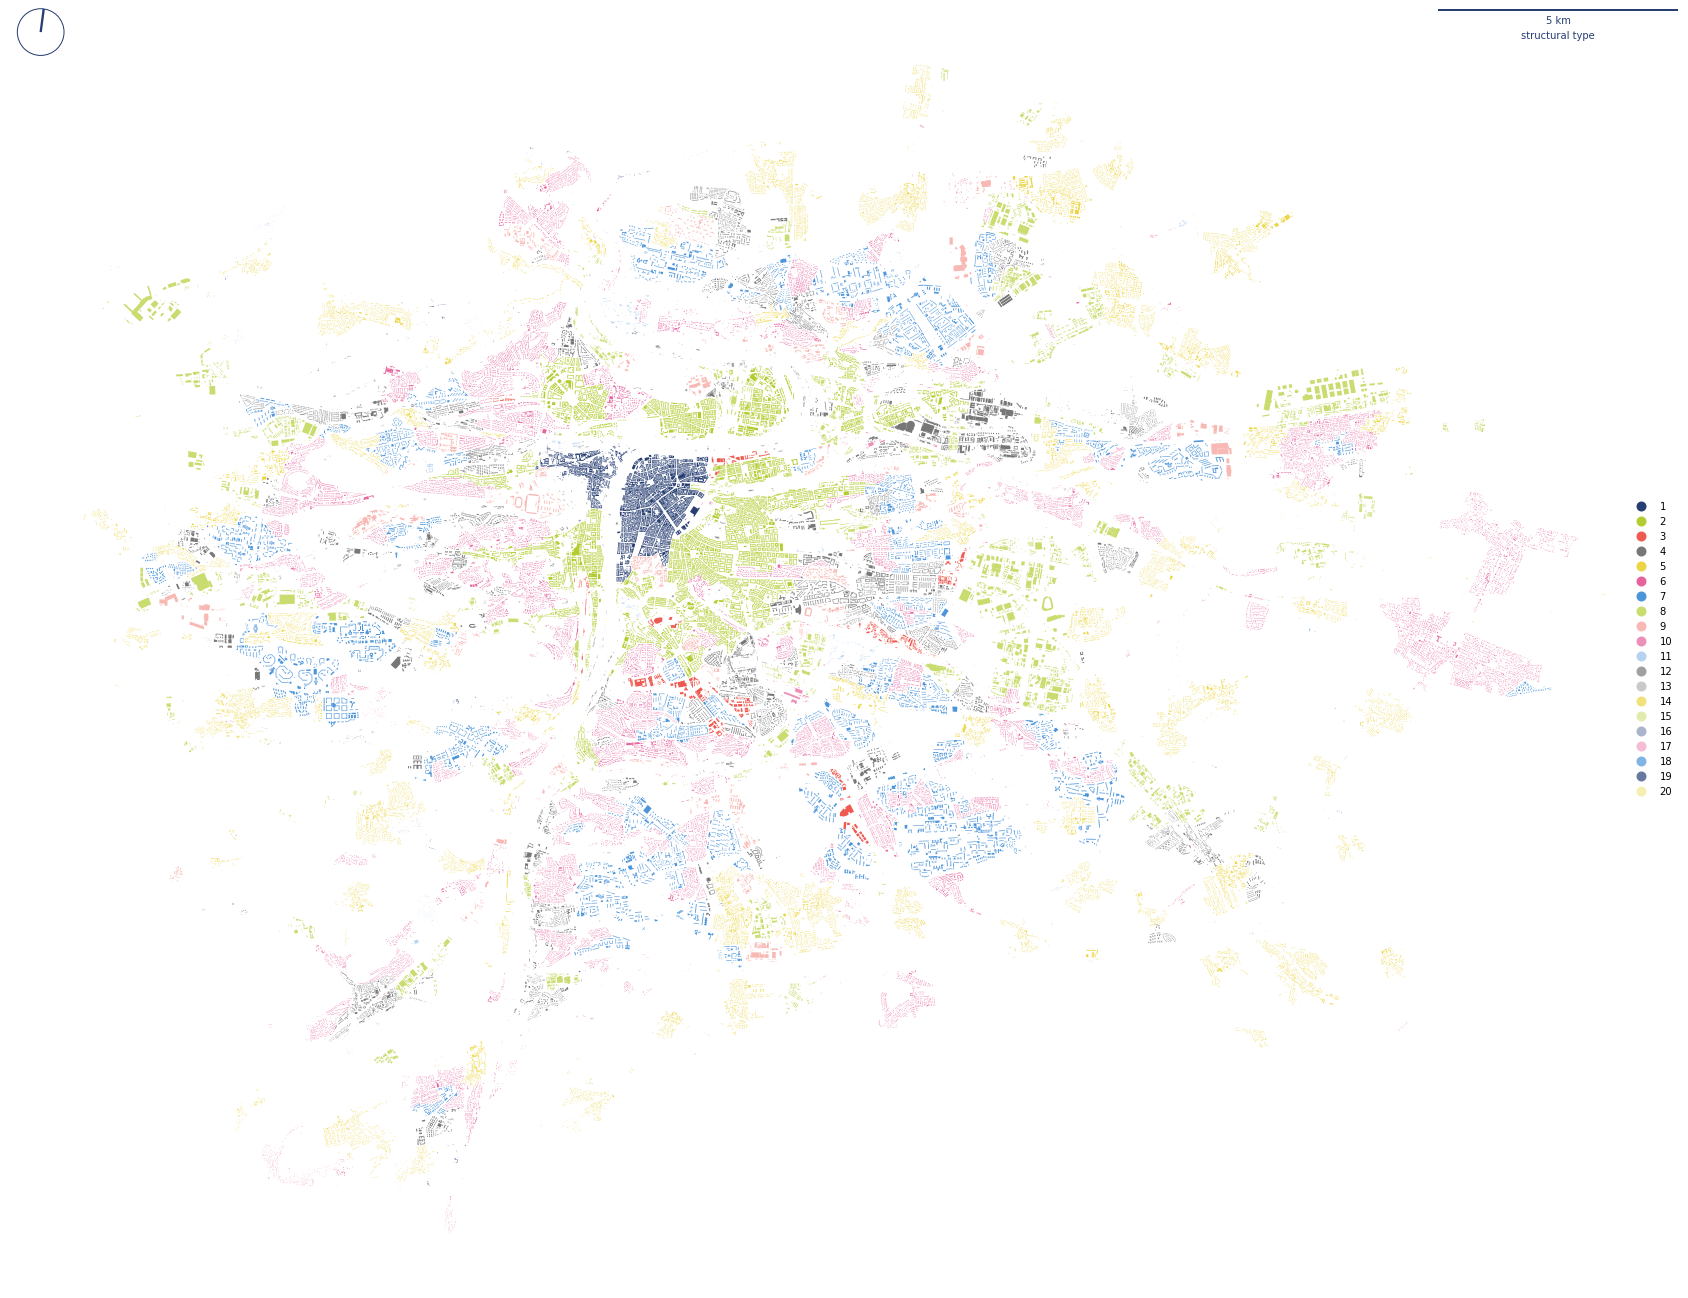

In [33]:
color = (257, 71, 27)  # here for arrow, title, scalebar

# plotting
c = husl.husl_to_hex(*color)

ax = joined.plot('STRUKTURA_STAV', categorical=True, figsize=(30, 30), cmap=cmap, legend=True,
                   legend_kwds=dict(loc='center right', frameon=False))
ax.set_axis_off()


# add scalebar
scalebar = ScaleBar(dx=1,
                    color=c,
                    location=1,
                    height_fraction=0.001,
                    #fixed_value=1000,
                    label='structural type',
                    label_loc='bottom'
                    )
ax.add_artist(scalebar)

# add arrow
north_arrow(plt.gcf(), ax, -7.5, legend_size=(.04,.04), outline=1, edgecolor=c, facecolor=c)
for ext in ['pdf', 'png']:
    plt.savefig('figures/PRG_structure.' + ext, bbox_inches='tight')

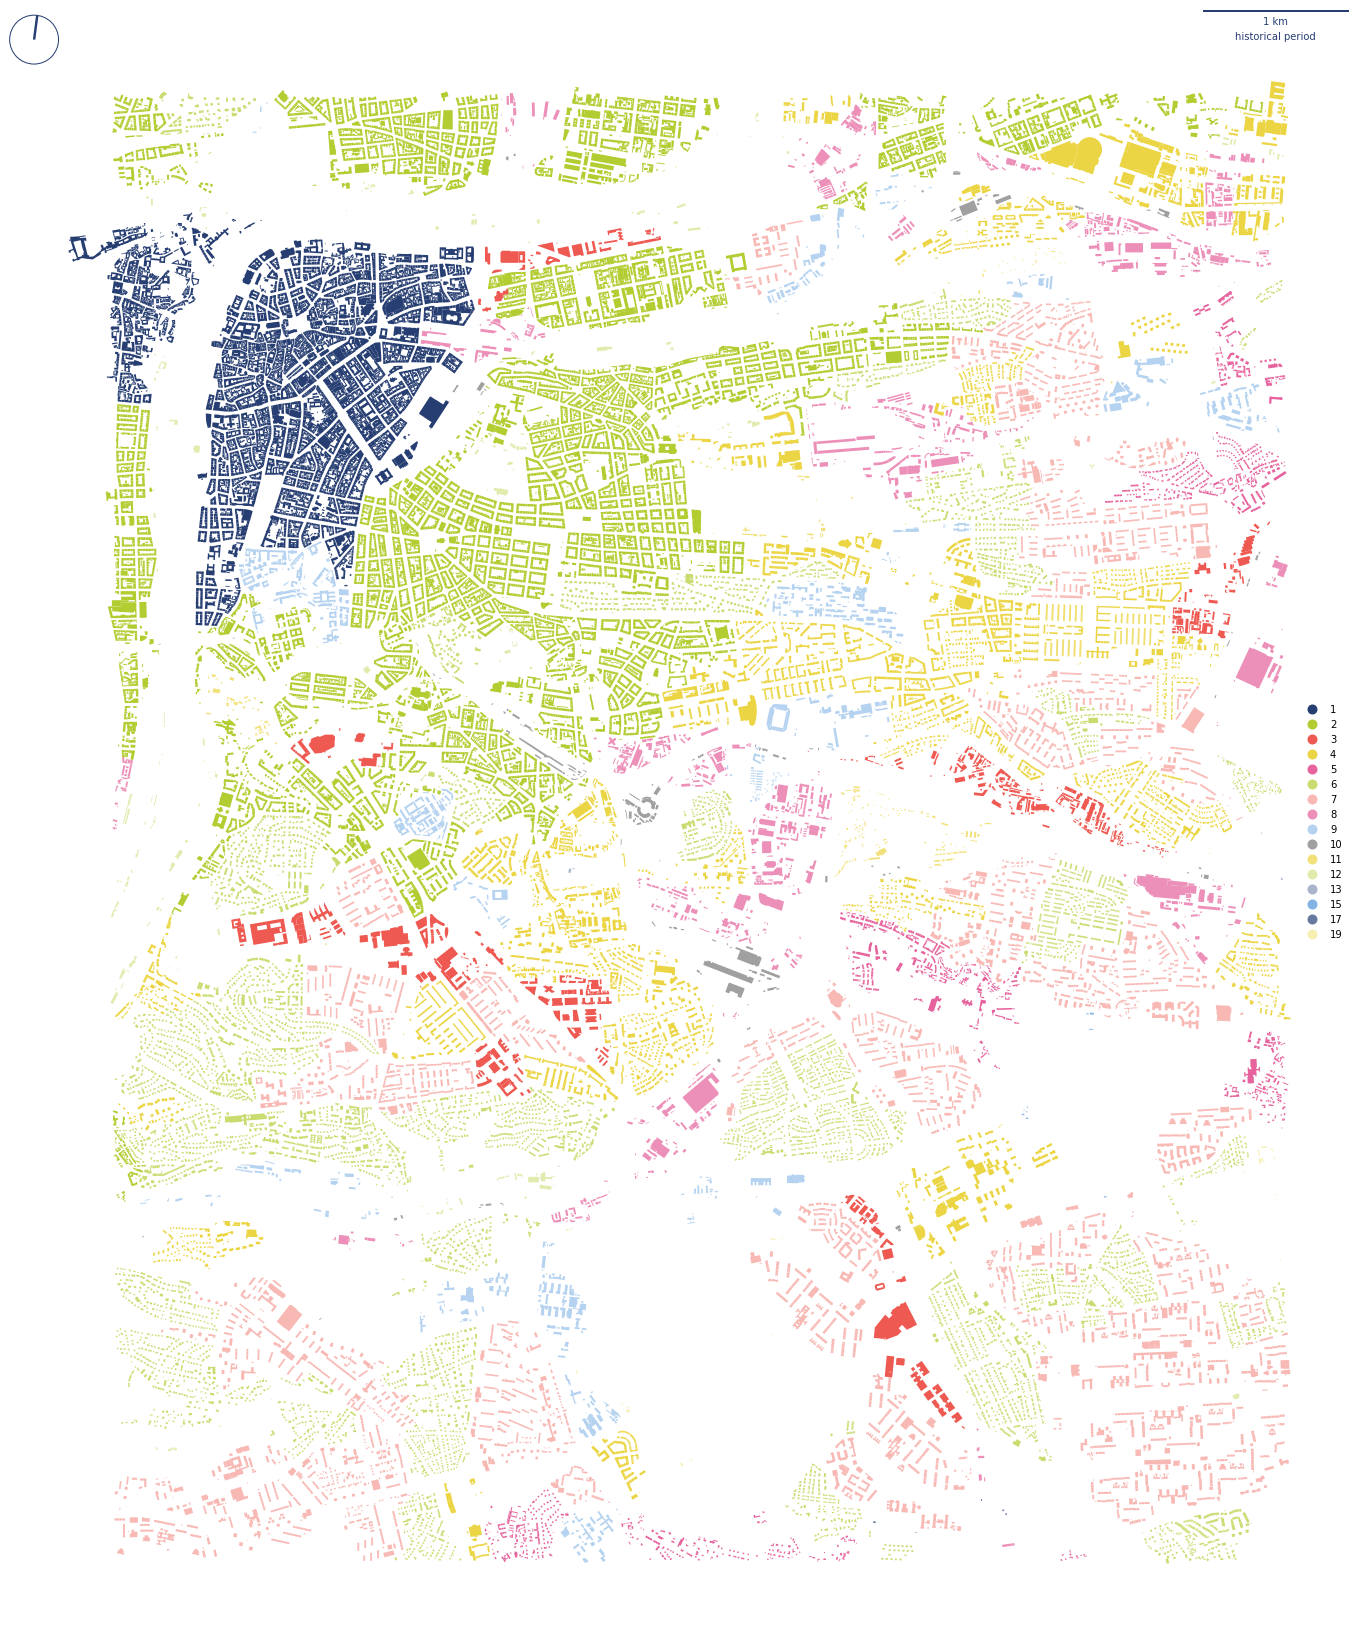

In [35]:
color = (257, 71, 27)  # here for arrow, title, scalebar

# plotting
c = husl.husl_to_hex(*color)

ax = joined.cx[-744085:-736085, -1051465:-1041465].plot('STRUKTURA_STAV', categorical=True, figsize=(30, 30), cmap=cmap, legend=True,
                   legend_kwds=dict(loc='center right', frameon=False))
ax.set_axis_off()


# add scalebar
scalebar = ScaleBar(dx=1,
                    color=c,
                    location=1,
                    height_fraction=0.001,
                    #fixed_value=1000,
                    label='historical period',
                    label_loc='bottom'
                    )
ax.add_artist(scalebar)

# add arrow
north_arrow(plt.gcf(), ax, -7.5, legend_size=(.04,.04), outline=1, edgecolor=c, facecolor=c)
for ext in ['pdf', 'png']:
    plt.savefig('figures/PRG_structure_detail.' + ext, bbox_inches='tight')

## analyse

In [14]:
import numpy as np

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 0.02
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

pal = cols

In [24]:
data = joined.loc[joined['cluster'].isin()]['STRUKTURA_STAV'].value_counts(sort=False, normalize=True)

# sns.set(context="paper", style="ticks", rc={'patch.force_edgecolor': False})
# fig, ax = plt.subplots(figsize=(10, 5))
# sns.barplot(ax=ax, x=data.index, y=data, order=data.index, palette=pal)
# sns.despine(offset=10)
# plt.ylabel('frequency')
# plt.xlabel('historical period')
# plt.ylim(0, 1)
# show_values_on_bars(ax)

TypeError: isin() missing 1 required positional argument: 'values'

In [11]:
sample = joined.loc[joined['STRUKTURA_STAV'].isin([1, 2, 5, 6, 7, 8, 9])]

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


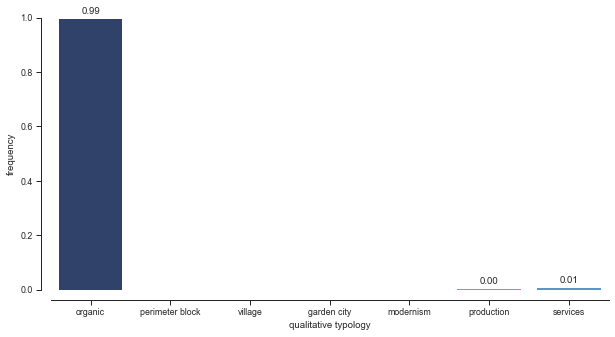

In [17]:
data = sample.loc[sample['cluster'].isin([11])]['STRUKTURA_STAV'].value_counts(sort=False, normalize=True)

labels = ['organic', 'perimeter block', 'village', 'garden city', 'modernism', 'production', 'services']
sns.set(context="paper", style="ticks", rc={'patch.force_edgecolor': False})
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(ax=ax, x=data.index, y=data, order=[1, 2, 5, 6, 7, 8, 9], palette=pal)
sns.despine(offset=10)
plt.ylabel('frequency')
plt.xlabel('qualitative typology')
plt.ylim(0, 1)
ax.set_xticklabels(labels)
show_values_on_bars(ax)

In [32]:
# save all clusters
for cl in range(20):
    data = sample.loc[sample['cluster'].isin([cl])]['STRUKTURA_STAV'].value_counts(sort=False, normalize=True)

    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(ax=ax, x=data.index, y=data, order=[1, 2, 5, 6, 7, 8, 9], palette=pal)
    sns.despine(offset=10)
    plt.ylabel('frequency')
    plt.xlabel('qualitative typology')
    plt.ylim(0, 1)
    ax.set_xticklabels(labels)
    show_values_on_bars(ax)
    for ext in ['pdf', 'png']:
        plt.savefig('figures/PRG_cluster_' + str(cl) + '_structure.' + ext, bbox_inches='tight')
    plt.close()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

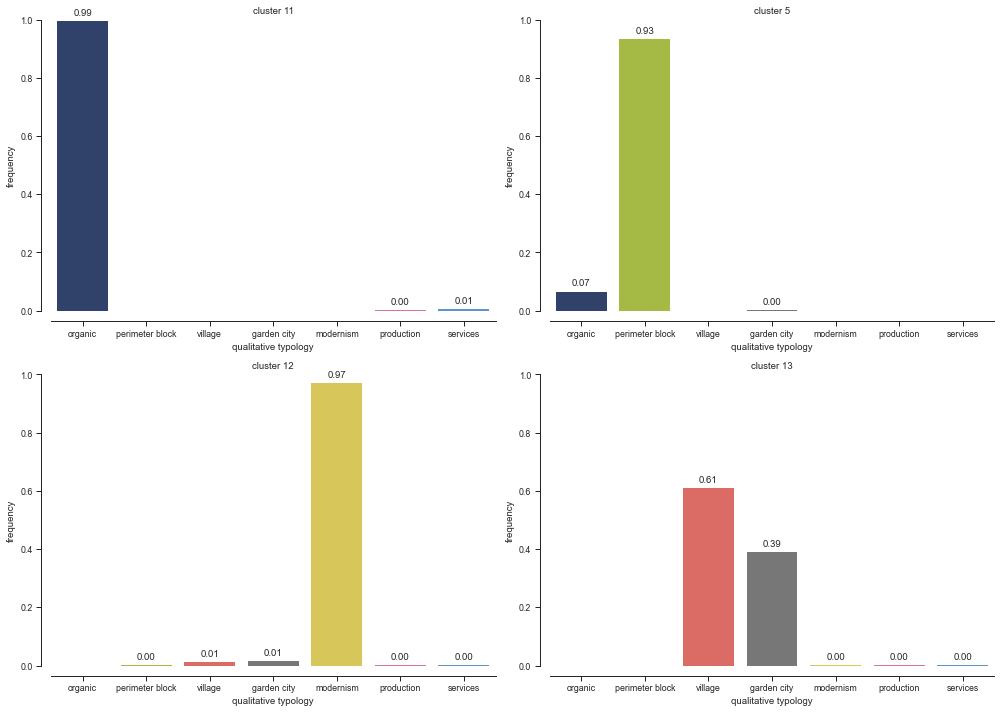

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

data = sample.loc[sample['cluster'].isin([11])]['STRUKTURA_STAV'].value_counts(sort=False, normalize=True)

sns.barplot(ax=ax[0, 0], x=data.index, y=data, order=[1, 2, 5, 6, 7, 8, 9], palette=pal)
sns.despine(offset=10)
ax[0,0].set_ylabel('frequency')
ax[0,0].set_xlabel('qualitative typology')
ax[0,0].set_title('cluster 11')
ax[0,0].set_ylim(0, 1)
ax[0,0].set_xticklabels(labels)
show_values_on_bars(ax[0, 0])

data = sample.loc[sample['cluster'].isin([5])]['STRUKTURA_STAV'].value_counts(sort=False, normalize=True)
sns.barplot(ax=ax[0, 1], x=data.index, y=data, order=[1, 2, 5, 6, 7, 8, 9], palette=pal)
sns.despine(offset=10)
ax[0,1].set_ylabel('frequency')
ax[0,1].set_xlabel('qualitative typology')
ax[0,1].set_title('cluster 5')
ax[0,1].set_ylim(0, 1)
ax[0,1].set_xticklabels(labels)
show_values_on_bars(ax[0, 1])

data = sample.loc[sample['cluster'].isin([12])]['STRUKTURA_STAV'].value_counts(sort=False, normalize=True)
sns.barplot(ax=ax[1, 0], x=data.index, y=data, order=[1, 2, 5, 6, 7, 8, 9], palette=pal)
sns.despine(offset=10)
ax[1,0].set_ylabel('frequency')
ax[1,0].set_xlabel('qualitative typology')
ax[1,0].set_title('cluster 12')
ax[1,0].set_ylim(0, 1)
ax[1,0].set_xticklabels(labels)
show_values_on_bars(ax[1, 0])

data = sample.loc[sample['cluster'].isin([13])]['STRUKTURA_STAV'].value_counts(sort=False, normalize=True)
sns.barplot(ax=ax[1, 1], x=data.index, y=data, order=[1, 2, 5, 6, 7, 8, 9], palette=pal)
sns.despine(offset=10)
ax[1,1].set_ylabel('frequency')
ax[1,1].set_xlabel('qualitative typology')
ax[1,1].set_title('cluster 13')
ax[1,1].set_ylim(0, 1)
ax[1,1].set_xticklabels(labels)
show_values_on_bars(ax[1, 1])

plt.tight_layout()
plt.savefig('figures/PRG_cluster_structure_subplot.pdf')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


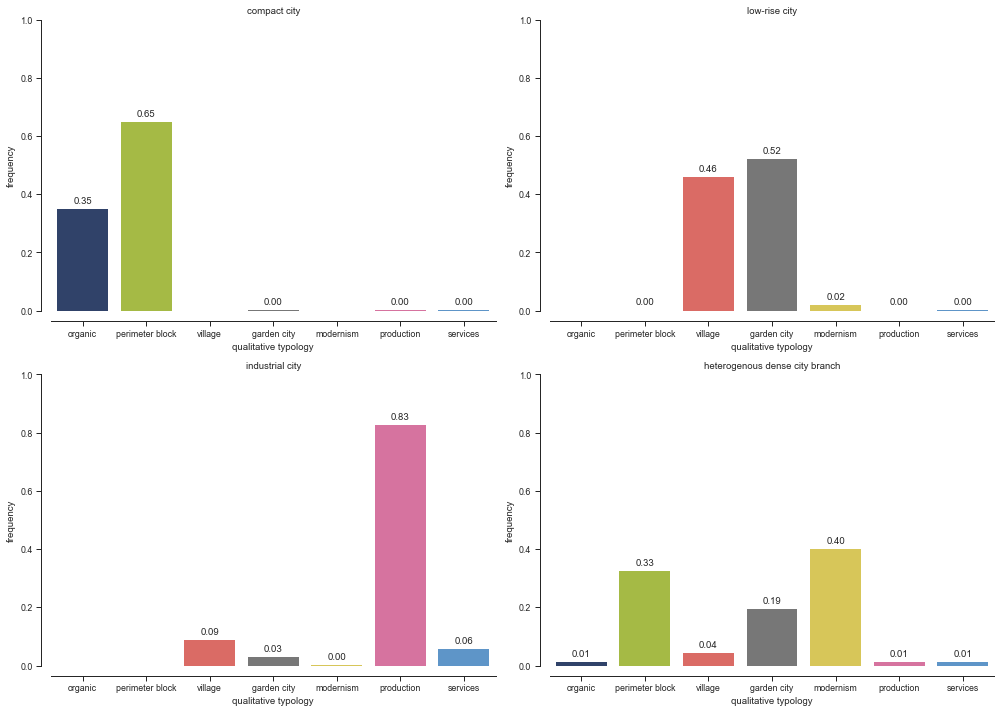

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

data = sample.loc[sample['cluster'].isin([11, 15, 5])]['STRUKTURA_STAV'].value_counts(sort=False, normalize=True)

sns.barplot(ax=ax[0, 0], x=data.index, y=data, order=[1, 2, 5, 6, 7, 8, 9], palette=pal)
sns.despine(offset=10)
ax[0,0].set_ylabel('frequency')
ax[0,0].set_xlabel('qualitative typology')
ax[0,0].set_title('compact city')
ax[0,0].set_ylim(0, 1)
ax[0,0].set_xticklabels(labels)
show_values_on_bars(ax[0, 0])

data = sample.loc[sample['cluster'].isin([3, 0, 8, 9, 13, 17])]['STRUKTURA_STAV'].value_counts(sort=False, normalize=True)
sns.barplot(ax=ax[0, 1], x=data.index, y=data, order=[1, 2, 5, 6, 7, 8, 9], palette=pal)
sns.despine(offset=10)
ax[0,1].set_ylabel('frequency')
ax[0,1].set_xlabel('qualitative typology')
ax[0,1].set_title('low-rise city')
ax[0,1].set_ylim(0, 1)
ax[0,1].set_xticklabels(labels)
show_values_on_bars(ax[0, 1])

data = sample.loc[sample['cluster'].isin([1, 19])]['STRUKTURA_STAV'].value_counts(sort=False, normalize=True)
sns.barplot(ax=ax[1, 0], x=data.index, y=data, order=[1, 2, 5, 6, 7, 8, 9], palette=pal)
sns.despine(offset=10)
ax[1,0].set_ylabel('frequency')
ax[1,0].set_xlabel('qualitative typology')
ax[1,0].set_title('industrial city')
ax[1,0].set_ylim(0, 1)
ax[1,0].set_xticklabels(labels)
show_values_on_bars(ax[1, 0])

data = sample.loc[sample['cluster'].isin([12, 14, 2, 10])]['STRUKTURA_STAV'].value_counts(sort=False, normalize=True)
sns.barplot(ax=ax[1, 1], x=data.index, y=data, order=[1, 2, 5, 6, 7, 8, 9], palette=pal)
sns.despine(offset=10)
ax[1,1].set_ylabel('frequency')
ax[1,1].set_xlabel('qualitative typology')
ax[1,1].set_title('heterogenous dense city branch')
ax[1,1].set_ylim(0, 1)
ax[1,1].set_xticklabels(labels)
show_values_on_bars(ax[1, 1])

plt.tight_layout()
plt.savefig('figures/PRG_branch_structure_subplot.pdf')

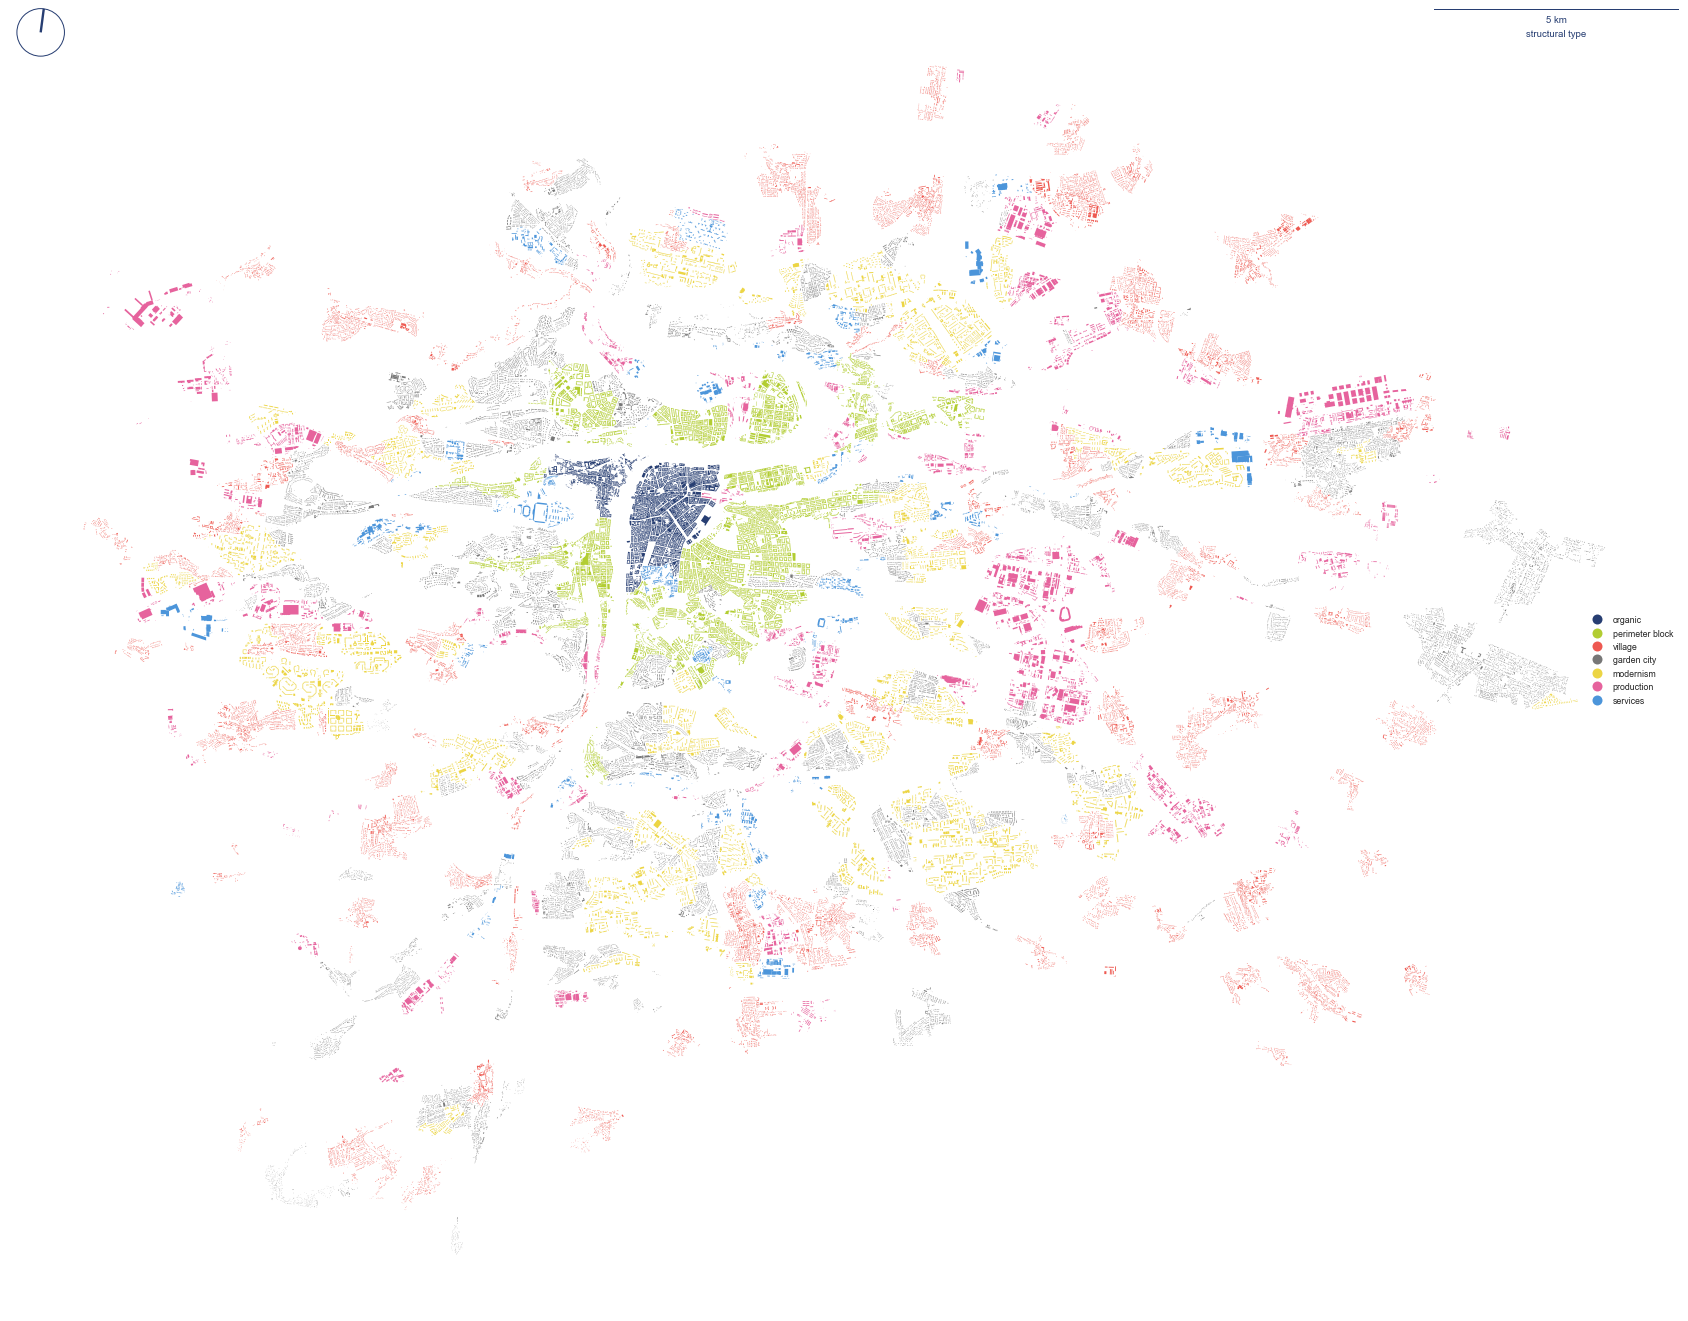

In [42]:
color = (257, 71, 27)  # here for arrow, title, scalebar
colors = [(257, 71, 27), (98, 93, 78), (14, 79, 58), (26, 0, 50),
          (75, 90, 85), (347, 72, 60), (246, 79, 60)]
cols = [husl.husl_to_hex(*color) for color in colors]
cmap = ListedColormap(cols)
# plotting
c = husl.husl_to_hex(*color)

ax = sample.plot('STRUKTURA_STAV', categorical=True, figsize=(30, 30), cmap=cmap, legend=True,
                   legend_kwds=dict(loc='center right', frameon=False))
ax.set_axis_off()


# add scalebar
scalebar = ScaleBar(dx=1,
                    color=c,
                    location=1,
                    height_fraction=0.001,
                    #fixed_value=1000,
                    label='structural type',
                    label_loc='bottom'
                    )
ax.add_artist(scalebar)

leg = ax.get_legend()
for x in range(7):
    leg.get_texts()[x].set_text(labels[x])

# add arrow
north_arrow(plt.gcf(), ax, -7.5, legend_size=(.04,.04), outline=1, edgecolor=c, facecolor=c)
for ext in ['pdf', 'png']:
    plt.savefig('figures/PRG_structure_sample.' + ext, bbox_inches='tight')

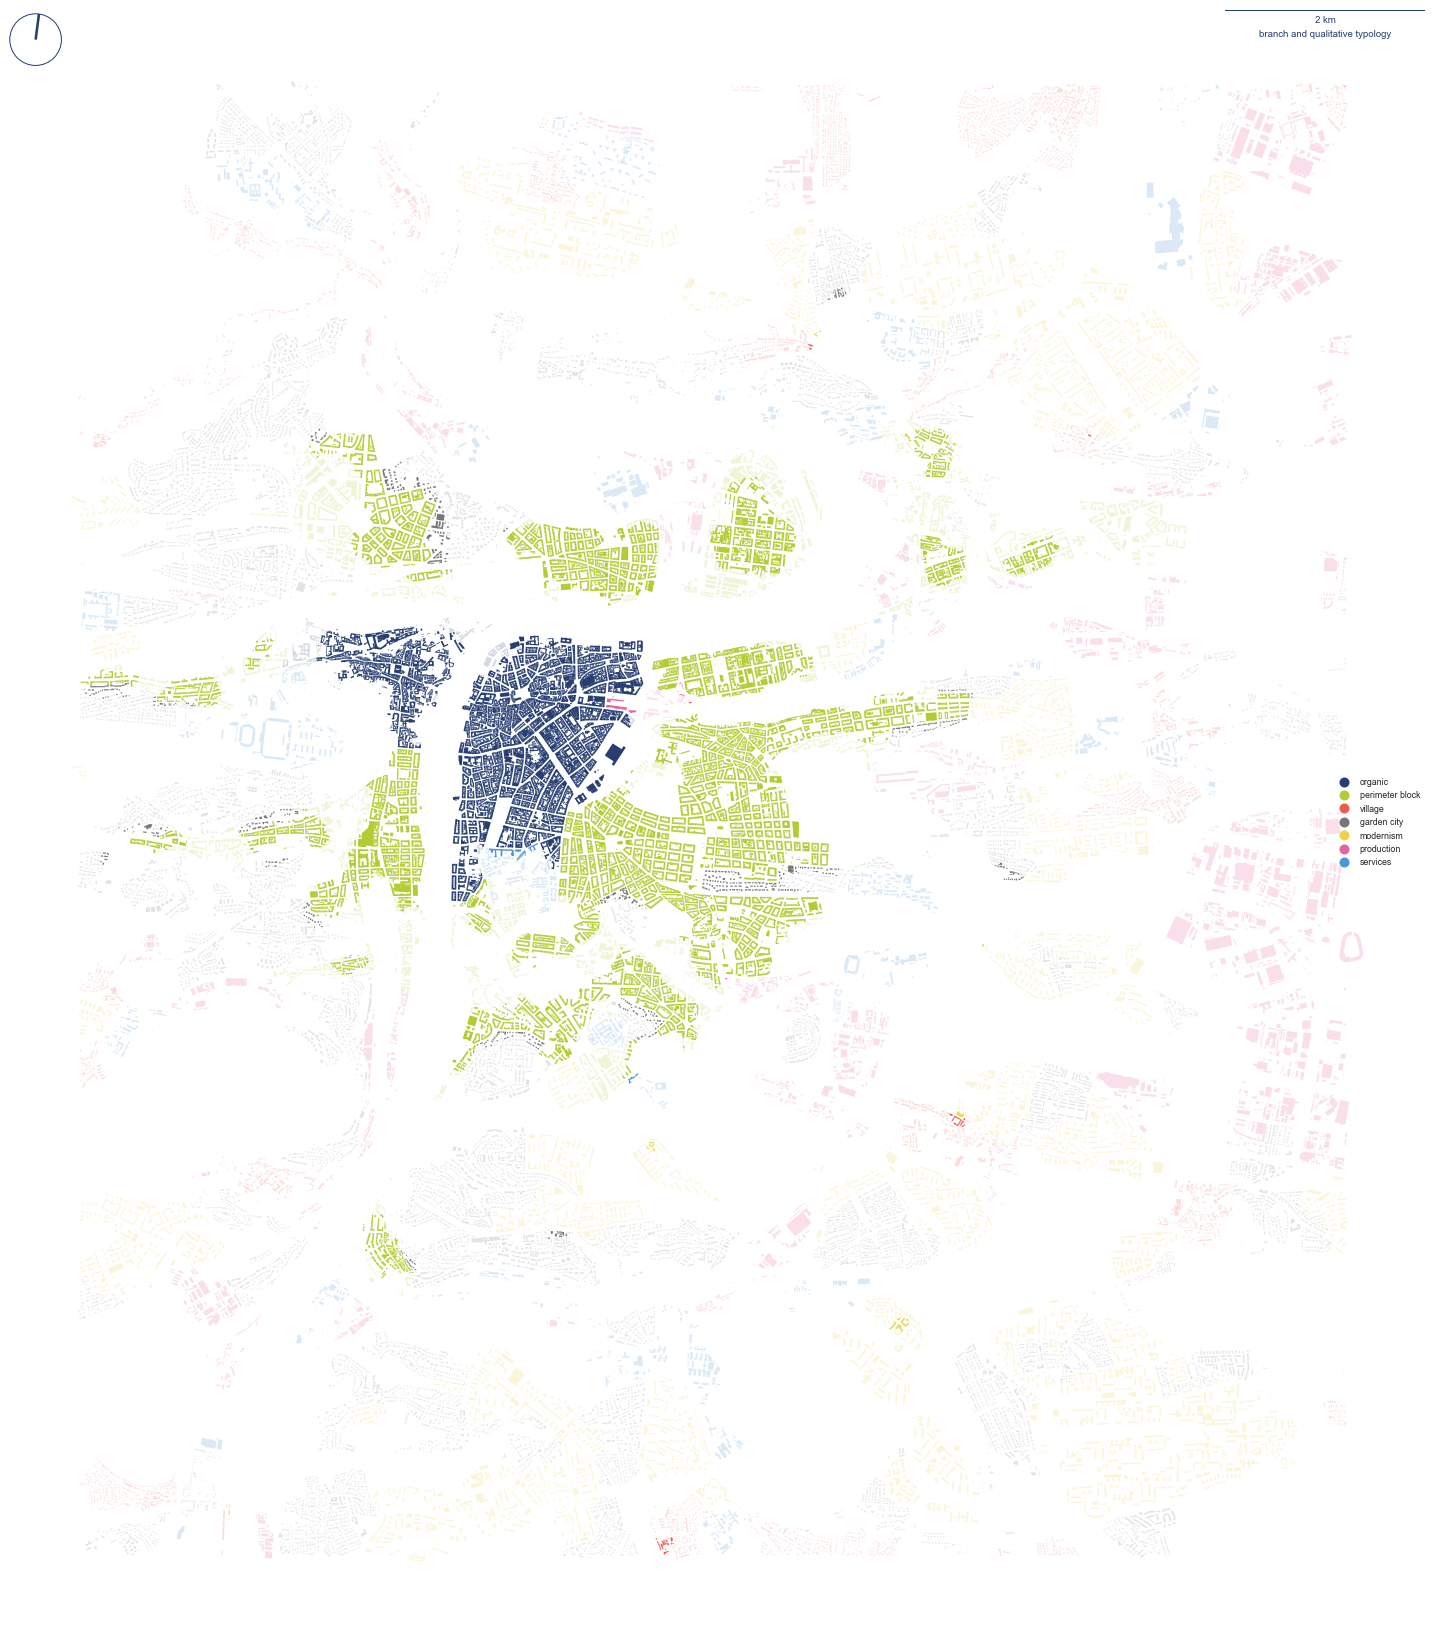

In [45]:
sub = sample[sample.cluster.isin([11, 15, 5, 10])]
bounds = sub.total_bounds
ax = sub.plot('STRUKTURA_STAV', categorical=True, figsize=(30, 30), cmap=cmap, zorder=2,
             legend=True,
                legend_kwds=dict(loc='center right', frameon=False))
sample.cx[bounds[0]:bounds[2], bounds[1]:bounds[3]].plot('STRUKTURA_STAV',ax=ax, categorical=True, cmap=cmap,
                alpha=.2, zorder=1)
ax.set_axis_off()

# add scalebar
scalebar = ScaleBar(dx=1,
                    color=c,
                    location=1,
                    height_fraction=0.001,
                    #fixed_value=1000,
                    label='branch and qualitative typology',
                    label_loc='bottom'
                    )
ax.add_artist(scalebar)

leg = ax.get_legend()
for x in range(7):
    leg.get_texts()[x].set_text(labels[x])

# add arrow
north_arrow(plt.gcf(), ax, -7.5, legend_size=(.04,.04), outline=1, edgecolor=c, facecolor=c)
for ext in ['pdf', 'png']:
    plt.savefig('figures/PRG_{}_strucuture_map.'.format('branch0') + ext, bbox_inches='tight')



In [12]:
import scipy.stats as ss
import numpy as np

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [13]:
cramers_v(sample.cluster, sample.STRUKTURA_STAV)

0.6739933957183716

In [14]:
confusion_matrix = pd.crosstab(sample.cluster, sample.STRUKTURA_STAV)
chi, p, dof, exp = ss.chi2_contingency(confusion_matrix)

In [20]:
p

0.0

In [15]:
dof

54

In [16]:
chi

325351.9432125189

In [17]:
print(confusion_matrix.to_markdown())

|   cluster |    1 |    2 |     5 |     6 |    7 |    8 |    9 |
|----------:|-----:|-----:|------:|------:|-----:|-----:|-----:|
|         0 |    0 |   17 |   377 |   213 |   39 | 3216 |  352 |
|         1 |    0 |    3 | 11384 | 16150 |  100 |    1 |    0 |
|         2 |    8 |  453 |  2937 |  2859 | 1394 | 2383 | 1085 |
|         3 |  192 | 6516 |   100 |   725 |  248 |  234 |  197 |
|         4 |    0 |   54 |   192 |   324 | 8782 |   17 |   49 |
|         5 |    0 |    0 | 13298 |  7824 |   40 |   33 |   61 |
|         6 |  604 | 8522 |     8 |   575 |    6 |    0 |    0 |
|         7 | 3281 |   49 |     0 |     0 |    0 |    3 |   78 |
|         8 |    0 |  263 |  6614 |  9900 | 2189 |   98 |   78 |
|         9 |    0 |    0 |   880 |  3176 | 1112 |    0 |   62 |


In [1]:
import pandas as pd

df = pd.read_clipboard()

In [5]:
df = df.set_index('cluster')

In [10]:
df.sum()[1:].sum()

119355.0

In [32]:
sample

uID                                           geometry  \
0            0  POLYGON ((-749844.585 -1052277.805, -749844.41...   
1            1  POLYGON ((-744449.580 -1042702.590, -744447.15...   
2            2  POLYGON ((-733304.060 -1048133.180, -733299.93...   
3            3  POLYGON ((-742471.510 -1039697.120, -742472.27...   
5            5  POLYGON ((-744176.230 -1042566.520, -744175.14...   
...        ...                                                ...   
140403  140457  POLYGON ((-742306.210 -1043656.250, -742334.11...   
140404  140458  POLYGON ((-745118.150 -1036872.010, -745120.66...   
140405  140459  POLYGON ((-741493.720 -1045901.360, -741493.82...   
140406  140460  POLYGON ((-741505.020 -1045901.010, -741505.41...   
140407  140461  POLYGON ((-752155.560 -1045248.230, -752191.00...   

                                    cent  index_right     ID CISLO_TXT  \
0       POINT (-749841.681 -1052279.951)          233  16170       617   
1       POINT (-744432.289 -1042699.409)          702  10080       008   
2       POINT (-733300.261 -1048136.856)          665  12820       282   
3       POINT (-742468.177 -1039691.997)          470  13170       317   
5       POINT (-744170.518 -1042567.507)           51  10100       010   
...                                  ...          ...    ...       ...   
140403  POINT (-742330.100 -1043654.354)          681  10060       006   
140404  POINT (-745114.729 -1036851.623)          619  13833     383_3   
140405  POINT (-741484.617 -1045909.408)          690  10410       041   
140406  POINT (-741509.029 -1045897.128)          690  10410       041   
140407  POINT (-752191.036 -1045077.650)          724  16090       609   

                NAZEV_STAV  ZASTAVENOST  VYUZITI_STAV  STRUKTURA_STAV  \
0       Cementárna Radotín            1             2               8   
1              Malá Strana            1             1               1   
2          Dolní Měcholupy            1             1               5   
3                    Troja            1             1               6   
5             Pražský hrad            1             1               1   
...                    ...          ...           ...             ...   
140403          Nové Město            1             1               1   
140404        Nový Suchdol            1             1               6   
140405               Nusle            1             1               2   
140406               Nusle            1             1               2   
140407          Na Radosti            1             2               8   

        MIRA_STABILITY_STAV  TYP_MESTA  KRAJINA  Shape_Length    Shape_Area  \
0                         5        1.0        1   2815.203269  2.398557e+05   
1                         4        1.0        1   5419.046731  6.920624e+05   
2                         1        1.0        1   4591.519869  5.817138e+05   
3                         1        1.0        1   4584.558976  4.537017e+05   
5                         4        1.0        1   1841.944551  9.997080e+04   
...                     ...        ...      ...           ...           ...   
140403                    4        1.0        1   9146.444675  1.689720e+06   
140404                    1        1.0        1   4961.740953  4.179709e+05   
140405                    1        1.0        1  10497.436247  1.099310e+06   
140406                    1        1.0        1  10497.436247  1.099310e+06   
140407                    5        1.0        1   3150.938920  3.905202e+05   

        cluster  
0           0.0  
1           7.0  
2           5.0  
3           5.0  
5           7.0  
...         ...  
140403      7.0  
140404      5.0  
140405      6.0  
140406      6.0  
140407      2.0  

[119413 rows x 16 columns]

# Revision

In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import husl
from legendgram import legendgram
import mapclassify
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.colors import ListedColormap
from shapely.geometry import Point

from tqdm import tqdm
from download import download

In [2]:
clusters = pd.read_csv('prg_cluster_labels_10.csv', index_col=0)

In [3]:
clusters

cluster     uID
0             0       0
1             7       1
2             5       2
3             5       3
4             3       4
...         ...     ...
140310        7  140457
140311        5  140458
140312        6  140459
140313        6  140460
140314        2  140461

[140315 rows x 2 columns]

In [6]:
years_path = download("https://www.dropbox.com/s/roa601e2ci4a30c/origin_year.csv?dl=1", "origin_year.csv")

Successfully downloaded file to origin_year.csv


In [7]:
years = pd.read_csv('origin_year.csv', index_col=0)

In [8]:
years['year'] = pd.Categorical(years['ROK_PUVODNI'], 
                               categories=[1840, 1880, 1920, 1950, 1970, 1990, 2012],
                               ordered=True)

In [9]:
joined = clusters.merge(years[['uID', 'year']], on='uID', how='left')

In [10]:
joined.head(4)

cluster  uID  year
0        0    0  1990
1        7    1  1840
2        5    2  1970
3        5    3  1950